## Import Default packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import COSMIC Packages

In [2]:
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent

## Set Initial Binaries parameters

In [3]:
#Setting what evolution types are allowed
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

#Set the initial binary population parameters
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = \
     InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=0.5,
                                primary_model='kroupa01', ecc_model='sana12', porb_model='sana12',
                                qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=100)

print(InitialBinaries)

     kstar_1  kstar_2    mass_1    mass_2          porb       ecc  \
0        1.0      1.0  3.843795  1.847284     59.465060  0.524327   
1        1.0      1.0  2.285379  2.234636   3462.706684  0.175162   
2        1.0      1.0  2.556156  1.530370      1.623573  0.098593   
3        1.0      1.0  5.263542  1.874793      2.489001  0.471415   
4        1.0      0.0  0.734169  0.634074      1.777794  0.019141   
..       ...      ...       ...       ...           ...       ...   
96       1.0      1.0  1.027173  1.016847  34164.225876  0.011117   
97       1.0      1.0  1.309583  0.863824      9.861404  0.038963   
98       1.0      1.0  1.327027  0.939745  43364.167407  0.218956   
99       1.0      1.0  1.697870  1.185664     74.166536  0.116849   
100      1.0      0.0  1.929041  0.635026   1103.699800  0.741105   

     metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0           0.02  13700.0  3.843795  1.847284  ...     0.0     0.0      0.0   
1           0

In [4]:
#Set the BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

#Evolve the system
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1       lum_1     rad_1        teff_1  \
0      0.0      1.0  3.843795  3.843795  197.537536  2.392974  14051.187410   
0  13700.0     11.0  0.832528  0.832528    0.000003  0.009939   2452.233159   
1      0.0      1.0  2.285379  2.285379   25.819706  1.800157   9740.970642   
1  13700.0     11.0  0.604059  0.610966    0.000004  0.012631   2233.361871   
2      0.0      1.0  2.556156  2.556156   40.618928  1.909483  10592.387849   
2  13700.0     11.0  0.804951  0.804951    0.000004  0.010254   2627.816095   
3      0.0      1.0  5.263542  5.263542  628.297287  2.861414  17160.129926   
3  13700.0     12.0  1.272452  1.272452    0.000005  0.003783   4380.246165   
4      0.0      0.0  0.734169  0.734169    0.143072  0.681772   4318.559368   
4  13700.0      0.0  0.734169  0.734169    0.190322  0.727470   4489.877513   

    massc_1    radc_1        menv_1  ...         porb          sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ...    59.465

In [5]:
print(bpp.iloc[:10])

        tphys    mass_1    mass_2  kstar_1  kstar_2         sep       porb  \
0    0.000000  3.843795  1.847284      1.0      1.0  114.425987  59.465060   
0  203.930523  3.842569  1.847284      2.0      1.0  114.450625  59.490673   
0  204.780206  3.842358  1.847289      2.0      1.0   54.583588  19.593979   
0  204.921109  3.822125  1.867474      3.0      1.0   53.889127  19.221312   
0  204.921109  3.822125  1.867474      3.0      1.0   53.889127  19.221312   
0  204.921109  4.480705  1.867474      3.0     15.0    0.000000   0.000000   
0  205.836741  4.479499  0.000000      4.0     15.0    0.000000   0.000000   
0  244.753146  4.444216  0.000000      5.0     15.0    0.000000   0.000000   
0  246.540397  4.403212  0.000000      6.0     15.0    0.000000   0.000000   
0  247.155462  0.832528  0.000000     11.0     15.0    0.000000   0.000000   

        ecc    RRLO_1    RRLO_2  ...  B_2  bacc_1  bacc_2  tacc_1  tacc_2  \
0  0.524327  0.099125  0.093970  ...  0.0     0.0     0.0     0.

## Get all parameters wanted/needed
## (mass1, mass2, period, ecc, semi-major(a), sini, rv_variability)
### sini is not calculated so create artificial data

In [6]:
mass1 = bcm.mass_1[bcm.tphys == 13700.0]
#print(mass1)
mass2 = bcm.mass_2[bcm.tphys == 13700.0]
#print(mass2)
period = bcm.porb[bcm.tphys == 13700.0]
#print(period)
ecc = bcm.ecc[bcm.tphys == 13700.0]
#print(ecc)
a = bcm.sep[bcm.tphys == 13700.0]
#print(a)

In [7]:
#Checking to make sure all initial dataframes are the 
#same length
print(len(mass1))
print(len(mass2))
print(len(period))
print(len(ecc))
print(len(a))

101
101
101
101
101


In [8]:
#Create artificial sini data
sin_i = np.random.uniform(0, 1, len(mass1))
sin_i = pd.DataFrame(sin_i)
print(len(sin_i))

101


In [9]:
#Define rv_variability function
def rv_variable(m1, m2, a, period, ecc, sin_i):
    """
    Function to calculate readial velocity variability
    
    m1: Mass 1
    m2: Mass 2
    period: Period
    ecc: Eccentricity
    a: amplitude
    """
    #print(1-ecc**2)
    var = (2*np.pi*a*m2*sin_i)/(period*(m1+m2)*(1-ecc**2)**(1/2))
    print(type(var))
    return var

## Problems occur past here:
1.Periods of 0 and -1 and inf

2.Semi-major axis(a) of 0 and -1

3.Eccentricity of -1

4.Might be hidden 'inf' values

5.Check to make sure all rv_var values are positive and non-zero

In [10]:
#Here you can manually check
#What values you'd want to remove
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(ecc)

0     -1.000000
1      0.000000
2     -1.000000
3     -1.000000
4      0.018940
5     -1.000000
6      0.000000
7      0.000000
8      0.067844
9      0.000000
10    -1.000000
11     0.000000
12    -1.000000
13    -1.000000
14     0.181316
15     0.174032
16     0.000000
17    -1.000000
18     0.000000
19     0.340782
20    -1.000000
21     0.135760
22    -1.000000
23     0.059221
24     0.009713
25     0.557067
26    -1.000000
27    -1.000000
28    -1.000000
29     0.380813
30     0.011580
31    -1.000000
32     0.000000
33    -1.000000
34    -1.000000
35    -1.000000
36    -1.000000
37    -1.000000
38     0.680725
39    -1.000000
40     0.304599
41     0.000000
42     0.233123
43     0.067131
44     0.132058
45    -1.000000
46     0.017467
47     0.083086
48    -1.000000
49     0.000000
50    -1.000000
51    -1.000000
52    -1.000000
53    -1.000000
54     0.153942
55     0.684327
56     0.000000
57    -1.000000
58     0.407420
59     0.115814
60    -1.000000
61    -1.000000
62     0

In [11]:
p = period[period != 0]
p = p[p != -1]
p = p[p != np.inf]
print(len(p))

54


In [12]:
semi = a[a != 0]
semi = semi[semi != -1]
print(len(semi))

54


In [13]:
e = ecc[ecc != -1]
print(len(e))

56


## Now we have new filtered dataframes:
 But they are different lengths so can't pass through function, so must make them all the same length
 Find the indecies of all unwanted values to remove

## Possible dummy stupid simple method

In [14]:
#period indecies
x = period.index[period == 0]
y = period.index[period == -1]
z = period.index[period == np.inf]

#Update del_arr
del_arr = x
del_arr = del_arr.append(y)
del_arr = del_arr.append(z)
print(del_arr)

#Semi major indecies
x_2 = a.index[a == 0]
y_2 = a.index[a == -1]

#Update del_arr
del_arr = del_arr.append(x_2)
del_arr = del_arr.append(y_2)
print(del_arr)

#Ecc indecies
x_3 = ecc.index[ecc == -1]

#Update del_arr
del_arr = del_arr.append(x_3)
print(del_arr)

#Create final array and remove dupplicates
delete_arr=[]
for i in del_arr:
    if i not in delete_arr:
        delete_arr.append(i)

Int64Index([ 0,  2,  3,  5, 10, 12, 13, 17, 20, 26, 27, 28, 31, 33, 34, 35, 36,
            37, 39, 45, 48, 50, 51, 52, 53, 57, 60, 61, 63, 64, 66, 67, 68, 71,
            72, 73, 76, 82, 88, 93, 97, 99,  7, 16, 22, 65, 87],
           dtype='int64')
Int64Index([ 0,  2,  3,  5, 10, 12, 13, 17, 20, 26, 27, 28, 31, 33, 34, 35, 36,
            37, 39, 45, 48, 50, 51, 52, 53, 57, 60, 61, 63, 64, 66, 67, 68, 71,
            72, 73, 76, 82, 88, 93, 97, 99,  7, 16, 22, 65, 87,  0,  2,  3,  5,
            10, 12, 13, 17, 20, 26, 27, 28, 31, 33, 34, 35, 36, 37, 39, 45, 48,
            50, 51, 52, 53, 57, 60, 61, 63, 64, 66, 67, 68, 71, 72, 73, 76, 82,
            88, 93, 97, 99,  7, 16, 22, 65, 87],
           dtype='int64')
Int64Index([ 0,  2,  3,  5, 10, 12, 13, 17, 20, 26,
            ...
            72, 73, 74, 76, 82, 86, 88, 93, 97, 99],
           dtype='int64', length=139)


In [15]:
print(del_arr)
print(delete_arr)

Int64Index([ 0,  2,  3,  5, 10, 12, 13, 17, 20, 26,
            ...
            72, 73, 74, 76, 82, 86, 88, 93, 97, 99],
           dtype='int64', length=139)
[0, 2, 3, 5, 10, 12, 13, 17, 20, 26, 27, 28, 31, 33, 34, 35, 36, 37, 39, 45, 48, 50, 51, 52, 53, 57, 60, 61, 63, 64, 66, 67, 68, 71, 72, 73, 76, 82, 88, 93, 97, 99, 7, 16, 22, 65, 87, 74, 86]


In [16]:
test2 = []
for i in range(len(ecc)):
    if ecc.index[i] not in delete_arr:
        test2.append(ecc[i])
test3 = []
for i in range(len(period)):
    if period.index[i] not in delete_arr:
        test3.append(period[i])
test4 = []
for i in range(len(a)):
    if a.index[i] not in delete_arr:
        test4.append(a[i])

#test2 = pd.DataFrame(test2)
#test3 = pd.DataFrame(test3)
#test4 = pd.DataFrame(test4)
    
print(test2)
print(test3)
print(test4)

[0.0, 0.018940245391486216, 0.0, 0.06784399584163424, 0.0, 0.0, 0.18131562357394893, 0.17403225460525512, 0.0, 0.3407818688714007, 0.13575952002871033, 0.05922132601781449, 0.009712725896050906, 0.5570669383170879, 0.38081252709111324, 0.011580030747797239, 0.0, 0.6807251108618843, 0.30459894654099773, 0.0, 0.2331226614647166, 0.06713082516028229, 0.13205844841101838, 0.017467264733484714, 0.08308588538564105, 0.0, 0.1539423531654353, 0.6843269282726483, 0.0, 0.4074202321322571, 0.11581378551374963, 0.0, 0.7991583728822281, 0.0, 0.540936031517642, 0.0, 0.2994376540858858, 0.0, 0.0, 0.6927609542616702, 0.7624532980424389, 0.030852909925778903, 0.0, 0.48140125543895196, 0.0, 0.0, 0.7103186547055775, 0.5713825577250856, 0.39575080935841245, 0.011045569930000753, 0.21705971227925996, 0.0]
[7.910251086388587, 1.760068015906413, 1.3822263977254408, 7964184.937982388, 2.627693964868814, 2.265811647425834, 69321.57089299691, 576.1328373968624, 1.214530121195312, 620.0425960990278, 181017.68572

In [17]:
print(len(test2), len(test3), len(test4))

52 52 52


In [18]:
m1 = []
for i in range(len(mass1)):
    if mass1.index[i] not in delete_arr:
        m1.append(mass1[i])
m2 = []
for i in range(len(mass2)):
    if mass2.index[i] not in delete_arr:
        m2.append(mass2[i])
sini = np.random.uniform(0, 1, len(m1))

## Now with the dataframes filtered
## We can Plot the new filtered data and compute our rv_variability

test2.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Ecc')
plt.xlabel('Ecc')
plt.show()

test3.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Period')
plt.xlabel('Period')
plt.show()

test4.plot(kind='hist', edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Semi Major Axis')
plt.xlabel('a')
plt.show()

In [19]:
m1 = np.array(m1)
m2 = np.array(m2)
test2 = np.array(test2)
test3 = np.array(test3)
test4 = np.array(test4)
sini = np.array(sini)
#print(test2)
print(type(test2), type(m1))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [20]:
rv = rv_variable(m1, m2, test4, test3, test2, sini)

<class 'numpy.ndarray'>


In [21]:
print(rv)

[ 4.50783994  1.38212605  4.70835604  0.07218751  5.77358018  5.20414175
  0.26127555  0.96278025 12.9882024   0.51582287  0.0528591   1.74037426
  0.78864887  3.25388658  1.02498276  0.02389227  0.73522687  0.04850269
  6.84537279  1.20956678  7.16986916  1.63378335  0.0659277   0.82597335
  0.67026589  2.53320746  0.1168728   2.04745876  2.03167898  2.12472648
  1.57891372  0.76033428  0.77887528  0.2693981   0.14748037  0.13470406
  0.3570142   0.22802074  5.07259559  0.48699557  1.8053598   1.43768067
  1.56710173  7.35307584  5.67664084  0.9261963   1.51274657  1.62587887
  0.56253242  0.02856954  0.38608193  9.54765112]


In [22]:
print(len(rv))

52


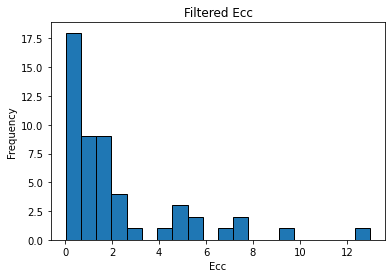

In [29]:
rv = pd.DataFrame(rv)

rv.plot(kind='hist', bins=20, edgecolor='black', alpha=1, legend=None)
plt.title('Filtered Ecc')
plt.xlabel('Ecc')
plt.show()

In [24]:
print(bpp)

            tphys     mass_1    mass_2  kstar_1  kstar_2           sep  \
0        0.000000   3.843795  1.847284      1.0      1.0  1.144260e+02   
0      203.930523   3.842569  1.847284      2.0      1.0  1.144506e+02   
0      204.780206   3.842358  1.847289      2.0      1.0  5.458359e+01   
0      204.921109   3.822125  1.867474      3.0      1.0  5.388913e+01   
0      204.921109   3.822125  1.867474      3.0      1.0  5.388913e+01   
0      204.921109   4.480705  1.867474      3.0     15.0  0.000000e+00   
0      205.836741   4.479499  0.000000      4.0     15.0  0.000000e+00   
0      244.753146   4.444216  0.000000      5.0     15.0  0.000000e+00   
0      246.540397   4.403212  0.000000      6.0     15.0  0.000000e+00   
0      247.155462   0.832528  0.000000     11.0     15.0  0.000000e+00   
0    13700.000000   0.832528  0.000000     11.0     15.0  0.000000e+00   
1        0.000000   2.285379  2.234636      1.0      1.0  1.591997e+03   
1      842.542406   2.285379  2.234636

In [27]:
time = np.array(bpp.tphys[0])
time = np.delete(time, -1)
m1 = np.array(bpp.mass_1[0])
m1 = np.delete(m1, -1)
m2 = np.array(bpp.mass_2[0])
m2 = np.delete(m2, -1)
a = np.array(bpp.sep[0])
a = np.delete(a, -1)
print(m2)

[1.84728381 1.84728391 1.84728855 1.86747443 1.86747443 1.86747443
 0.         0.         0.         0.        ]


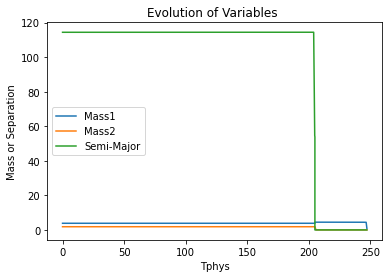

In [28]:
fig, ax = plt.subplots()
ax.plot(time, m1)
ax.plot(time, m2)
ax.plot(time, a)
plt.xlabel("Tphys")
plt.ylabel("Mass or Separation" )
plt.title("Evolution of Variables ")
plt.legend(["Mass1", "Mass2", "Semi-Major"])